C:\Users\KIIT\AppData\Local\Temp\ipykernel_1112\1876196119.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((-1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon)))


Q1 - Final Cost (alpha=0.1): 0.22908939844423182
Q1 - Final Parameters (theta): [ 0.32395465  2.38613663 -2.49462467]


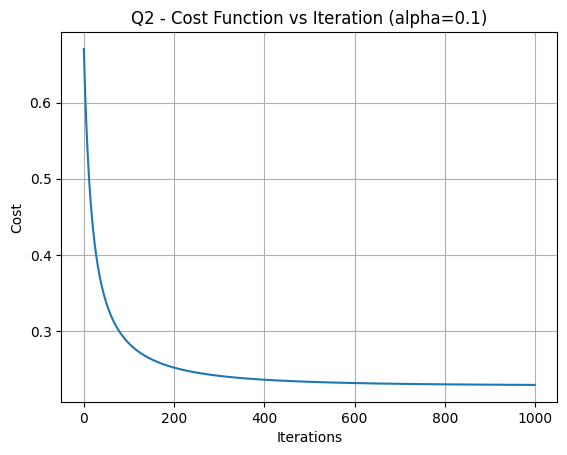

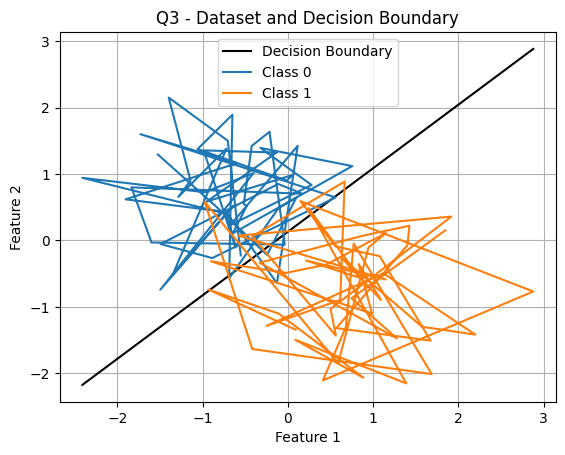

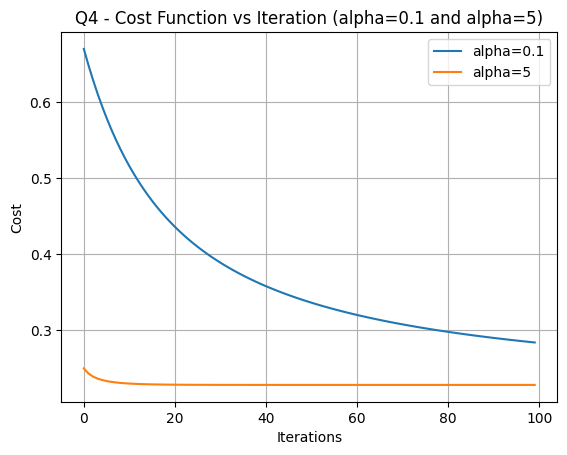


Q5 - Confusion Matrix
TP: 42 FP: 5
FN: 8 TN: 45

Q5 - Evaluation Metrics
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1 Score: 0.8659793814432989


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 0: Load the data
logistic_X="https://drive.google.com/uc?export=download&id=1cGVAYuW8Uc5uERse2gONOPJK4uqNnIPQ"
logistic_Y="https://drive.google.com/uc?export=download&id=1zCl2xTRS3vyzTsGrK2t2fG9ITiN-W__h"
X = pd.read_csv(logistic_X, header=None).values
y = pd.read_csv(logistic_Y, header=None).values

# Normalize the independent variables (as per Note 6)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept (bias) term

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return float((-1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon)))

# Gradient Descent
def gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (X.T @ (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)  

    return theta, cost_history


# Question 1: Train with learning rate = 0.1
theta_01, cost_01 = gradient_descent(X, y, alpha=0.1, num_iters=1000)
print("Q1 - Final Cost (alpha=0.1):", cost_01[-1])
print("Q1 - Final Parameters (theta):", theta_01.flatten())

# Question 2: Plot cost vs iterations for alpha=0.1
plt.plot(range(1000), cost_01, label='alpha=0.1')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Q2 - Cost Function vs Iteration (alpha=0.1)")
plt.grid(True)
plt.savefig("q2_cost_vs_iter.png")
plt.show()

# Question 3: Plot dataset and decision boundary (non-scatter)
def plot_decision_boundary(theta, X, y, title):
    x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x2 = -(theta[0] + theta[1]*x1) / theta[2]
    y = y.flatten()

    plt.plot(x1, x2, label='Decision Boundary', color='black')
    for cls in [0, 1]:
        plt.plot(X[y == cls][:,1], X[y == cls][:,2], label=f'Class {cls}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("q3_decision_boundary.png")
    plt.show()

plot_decision_boundary(theta_01, X, y, "Q3 - Dataset and Decision Boundary")

# Question 4: Cost vs iteration for learning rate 0.1 and 5
theta_1, cost_1 = gradient_descent(X, y, alpha=0.1, num_iters=100)
theta_5, cost_5 = gradient_descent(X, y, alpha=5.0, num_iters=100)

plt.plot(range(100), cost_1, label='alpha=0.1')
plt.plot(range(100), cost_5, label='alpha=5')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Q4 - Cost Function vs Iteration (alpha=0.1 and alpha=5)")
plt.legend()
plt.grid(True)
plt.savefig("q4_compare_learning_rates.png")
plt.show()

# Question 5: Confusion Matrix and Evaluation Metrics
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X, theta_01)

tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))

accuracy = (tp + tn) / len(y)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nQ5 - Confusion Matrix")
print("TP:", tp, "FP:", fp)
print("FN:", fn, "TN:", tn)

print("\nQ5 - Evaluation Metrics")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)